In [2]:
#Random forest for different estimators value

import pandas as pd  
import numpy as np 
data = pd.read_csv(r"C:\Users\ADITI\Desktop\Bike sharing\Bike-Sharing-Dataset\day2.csv")


In [3]:
dataset = data[['season','yr','mnth','holiday','weekday','weathersit','d_atemp','d_hum','d_windspeed','cnt']]

#print(dataset.head() )
x = dataset.iloc[:, 0:9].values  
y = dataset.iloc[:, 9].values 

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)
y= y.reshape(-1,1)
y=sc.fit_transform(y)


c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\aditi\appdata\local\programs\python\python36-32\l

c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


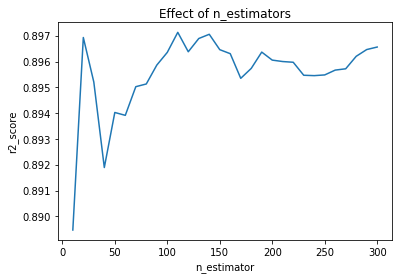

In [52]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
estimators = []
scores = []
from sklearn.metrics import r2_score


for i in range(10,310,10) :
       regressor = RandomForestRegressor(n_estimators=i, random_state=42)  
       regressor.fit(X_train, y_train)  
       y_pred = regressor.predict(X_test) 
       estimators.append(i)
       scores.append(r2_score(y_test , y_pred))
       
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("r2_score")
plt.plot(estimators, scores)
#print(estimators)
plt.savefig('randomforestscore.png')
plt.show()
#print(max(scores))


In [8]:

#MODEL EVALUATION

#Evaluation parameters calculated for n_estimator=110 and test_size=0.2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


regressor = RandomForestRegressor(n_estimators=110, random_state=42)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
       
       
print('r2_score: ',r2_score(y_test,y_pred))

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  





c:\users\aditi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


r2_score:  0.8971317777761453
Mean Absolute Error: 0.055142365771527486
Mean Squared Error: 0.005790976014432771
Root Mean Squared Error: 0.07609846262857595


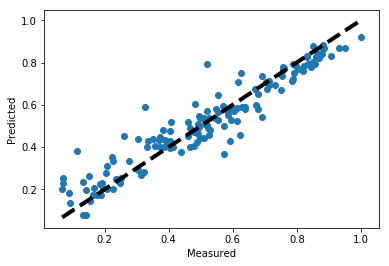

In [9]:
#Regression line

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()